In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [56]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

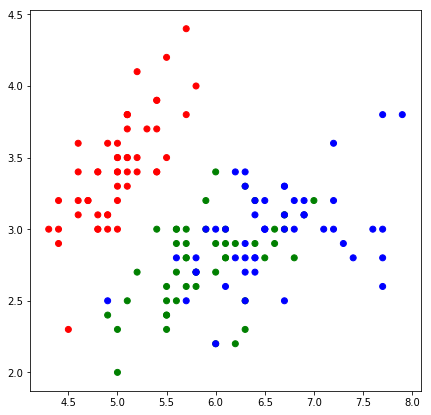

In [17]:
cmap = ListedColormap(['red', 'green', 'blue'])

plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [27]:
def m_metrics(x1, x2, q=2):
    distance = np.sum([(x1[i] - x2[i])**q for i in range(len(x1))])

    return distance**(1/q)

In [139]:
'''
Possible weight_types: d, i 
'''
def knn(x_train, y_train, x_test, k, q=2, wq=0.5, weight_type='d'):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = m_metrics(x, x_train[i], q)
            
            if weight_type == 'd':
                w = wq**distance
            elif weight_type == 'i':
                w = wq**i
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance + w, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [73]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [135]:
k = 1

y_pred = knn(X_train, y_train, X_test, k, wq=0.7, weight_type='i')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.700


In [29]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

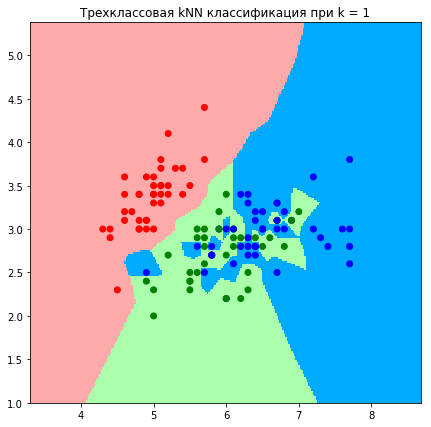

In [30]:
get_graph(X_train, y_train, k)

In [136]:
k = 3

y_pred = knn(X_train, y_train, X_test, k, wq=0.7, weight_type='i')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.667


In [137]:
k = 5

y_pred = knn(X_train, y_train, X_test, k, wq=0.7, weight_type='i')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.800


In [138]:
k = 10

y_pred = knn(X_train, y_train, X_test, k, wq=0.7, weight_type='i')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.767


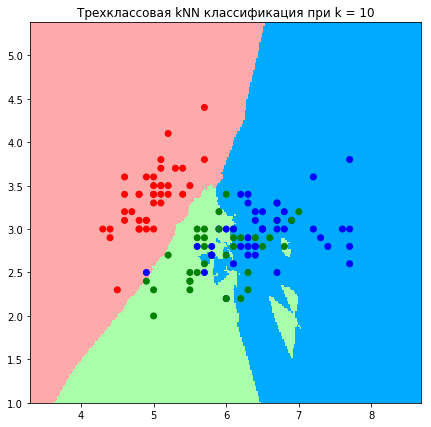

In [34]:
get_graph(X_train, y_train, k)